# Задание 1

Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для алгоритма forest Random  на наборе данных Organics. Постройте график зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 301, объясните полученные результаты. Получить графики зависимостей от других параметров моделей.


In [43]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

In [33]:
%matplotlib inline
df=pd.read_csv(r"ORGANICS.csv",encoding="cp1251")

In [34]:
df['TargetBuy'].replace([0,1],['No','Buy'],inplace=True)
df

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,No,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,No,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,Buy,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,Buy,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,No,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,No,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,No,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,No,0


In [35]:
df1= df.drop(df.columns[[0,12]], axis=1)

In [36]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df4 = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    22223 non-null object
DemGender          22223 non-null object
DemReg             22223 non-null object
DemTVReg           22223 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null object
dtypes: float64(5), object(6)
memory usage: 1.9+ MB
None


In [72]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
df4['DemClusterGroup'] = le.fit_transform(df4['DemClusterGroup'])
df4['DemGender'] = le.fit_transform(df4['DemGender'])
df4['DemReg'] = le.fit_transform(df4['DemTVReg'])
df4['DemTVReg'] = le.fit_transform(df4['DemTVReg'])
df4['PromClass'] = le.fit_transform(df4['PromClass'])
df4['TargetBuy'] = le.fit_transform(df4['TargetBuy'])
#display the initial records
df4.head()

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,2,2,11,11,0,16000.00,4.0,1
1,4.0,49.0,35.0,3,2,11,11,0,6000.00,5.0,1
2,5.0,70.0,27.0,3,0,11,11,2,0.02,8.0,0
3,10.0,65.0,51.0,5,1,4,4,3,0.01,7.0,0
4,11.0,68.0,4.0,0,0,4,4,3,0.01,8.0,1


In [179]:
X = df4[['DemAffl','DemAge','DemCluster','PromSpend','PromTime']]
y=np.asarray(df4['TargetBuy'],dtype='int8')

In [180]:
# Инициализируем стратифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [181]:
# Инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

In [182]:
# Обучаем на тренировочном датасете
results = cross_val_score(rfc, x, y, cv=skf)

In [183]:
# Оцениваем точность на тестовом датасете
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 76.45%


Получили точность 76.82%, теперь попробуем улучшить этот результат и посмотреть, как ведут себя кривые обучения при изменении основных параметров.

Начнем с количества деревьев:

In [184]:
trees_grid = [i for i in range(1, 302, 10)]

In [185]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_test_acc.append(rfc.score(X_test, y_test))
    test_acc.append(temp_test_acc)
    
test_acc = np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 78.28% with 291 trees


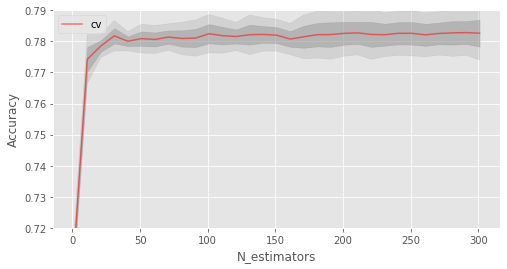

In [188]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))
#ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.72,0.79])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

Начиная с 31 дерева точность практически не меняется, а это значит что оптимальное количество деревьев 31

Теперь рассмотрим деревья с параметром максимальной глубины – `max_depth`.

In [247]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []

for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True, max_depth = 9)
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_test_acc.append(rfc.score(X_test, y_test))
    test_acc.append(temp_test_acc)
    
test_acc = np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 80.30% with 301 trees


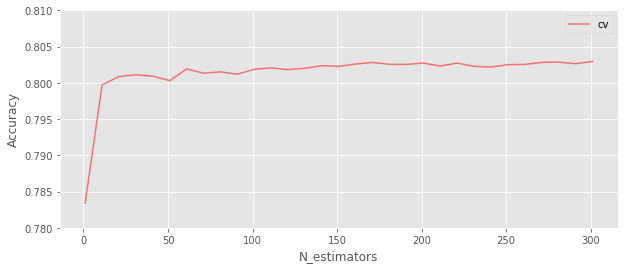

In [248]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.78,0.81])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

при глубине от 6 до 9 лучшая точность, с увеличением глубины она падает.

Теперь рассмотрим деревья с параметром `min_samples_leaf`, он так же выполняет функцию регуляризатора.


In [218]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []

for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True, min_samples_leaf = 24 )
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_test_acc.append(rfc.score(X_test, y_test))
    test_acc.append(temp_test_acc)
    
test_acc = np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

Best accuracy on CV is 80.21% with 111 trees


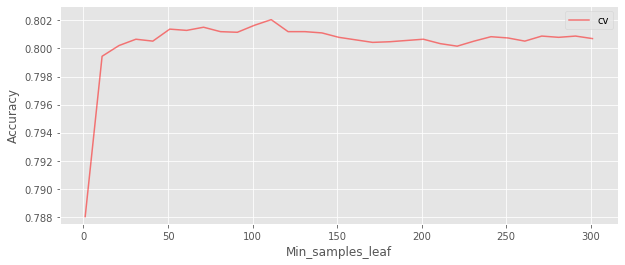

In [226]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.legend(loc='best')
ax.set_ylim([0.7875,0.803])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf");

лучшее кол-во деревьев 111


В нашем случае оптимальное число признаков — 10, именно с таким значением достигается наилучший результат.

Мы рассмотрели, как ведут себя кривые обучения в зависимости от изменения основных параметров. Давайте теперь с помощью `GridSearch` найдем оптимальные параметры для нашего примера.


In [238]:
# Сделаем инициализацию параметров, по которым хотим сделать полный перебор
parameters = {'max_features': [0.2, 0.4, 0,6, 0.8, 1], 'min_samples_leaf': [25, 27, 29, 31, 33], 'max_depth': [5,7,9, 11]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=True, random_state=42,
                                              verbose=0, warm_start=False),


In [245]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=7, max_features=0.6, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=27, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                        warm_start=False), 0.8027719029833956)

Лучшая точность, который мы смогли достичь с помощью перебора параметров — 80,3% при `'max_depth': 7, 'max_features': 0.6, 'min_samples_leaf': 27`. 